In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
x_axis = ["on_chain_1", "off_chain_10", "off_chain_20", "off_chain_25", "off_chain_40", "off_chain_50", "off_chain_80", "off_chain_100"]
y_axis_query = [46.29263961, 170.6618682, 163.5518694, 161.4152804, 150.9148123, 151.3734908, 129.2732772, 124.7687571]
y_axis_store = [41.59966551, 103.8915888, 100.3515567, 99.29187937
, 94.06299561, 94.30870691, 83.30276029, 81.08137628]
trans_basic_r = [0, 82.07746113869553, 78.51747265768893, 77.44630577147063, 72.18895494744372, 72.41283681940678, 61.348009952137716, 59.085457898483234]

In [3]:
y_axis_store[0] -= 19.80706318
for i in range(1, len(y_axis_store)):
    y_axis_store[i] -= trans_basic_r[i]

In [5]:
for i in range(len(y_axis_store)):
    y_axis_store[i] -= 6.33

In [6]:
for i in range(len(y_axis_store)):
    print(y_axis_store[i])

15.462602330000001
15.484127661304468
15.504084042311076
15.51557359852937
15.544040662556283
15.56587009059322
15.62475033786228
15.665918381516766


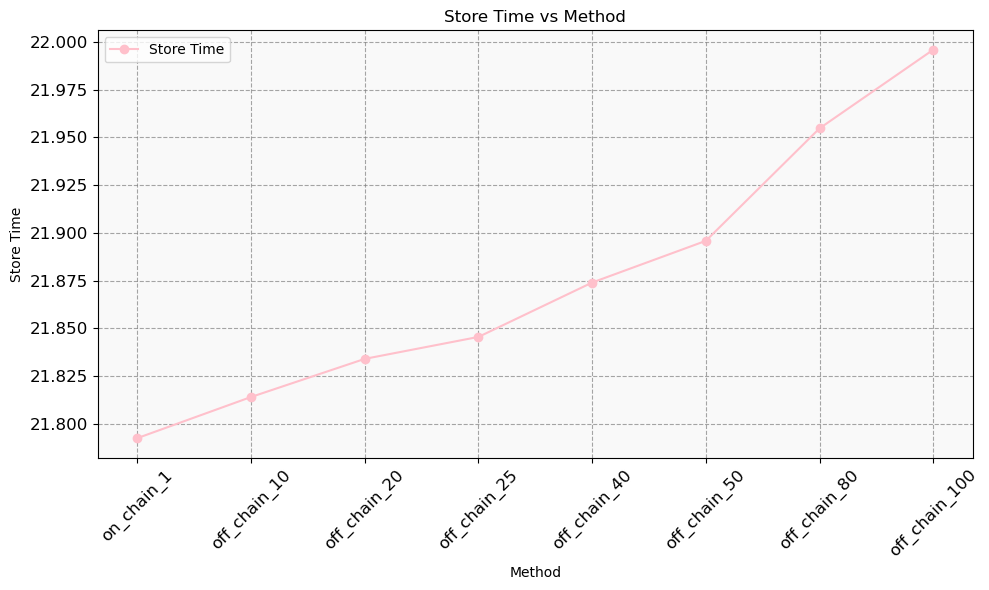

In [83]:
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis_store, marker='o', linestyle='-', color='pink', label='Store Time')

# 添加标题和标签
plt.title('Store Time vs Method')
plt.xlabel('Method')
plt.ylabel('Store Time')

# 显示图例
plt.legend()

# 优化网格
plt.grid(True, linestyle='--', color='grey', alpha=0.7)

# 美化图表
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # 调整布局以防止标签被截断

# 添加背景色
plt.gca().set_facecolor('#f9f9f9')
# 显示图表
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局以防止标签被截断
plt.show()

In [7]:
y_axis_query[0] -= 2 * 19.80706318
for i in range(1, len(y_axis_query)):
    y_axis_query[i] -= 2 * trans_basic_r[i]

In [10]:
for i in range(len(y_axis_query)):
    y_axis_query[i] -= 6.33

In [11]:
for i in range(len(y_axis_query)):
    print(y_axis_query[i])

39.962639610000004
164.33186819999997
157.22186939999997
155.0852804
144.58481229999998
145.0434908
122.9432772
118.4387571


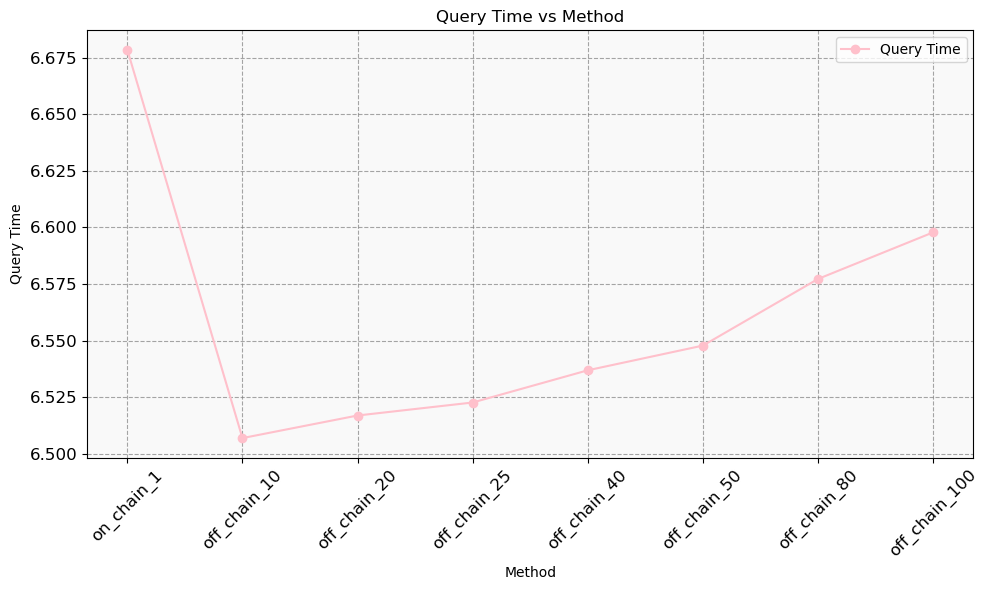

In [82]:
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis_query, marker='o', linestyle='-', color='pink', label='Query Time')

# 添加标题和标签
plt.title('Query Time vs Method')
plt.xlabel('Method')
plt.ylabel('Query Time')

# 显示图例
plt.legend()

# 优化网格
plt.grid(True, linestyle='--', color='grey', alpha=0.7)

# 美化图表
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # 调整布局以防止标签被截断

# 添加背景色
plt.gca().set_facecolor('#f9f9f9')
# 显示图表
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局以防止标签被截断
plt.show()

In [20]:
def storage_node_generate():
    # 模拟存储节点
    # 每个store_node 包含3个信息，distance|storage space|reputation, 并计算得到一个score
    store_node_num = 320
    store_node = {i: {'distance': 0, 'storage space': 0, 'probability': 0, 'score_sp': 0, 'score_sd': 0, 'batches': []}
                  for i in range(1, store_node_num + 1)}

    mean, std_dev = 4000, int(4000 / 4)  # 均值, 标准差
    print(f"mean: {mean}, std_dev: {std_dev}")
    gaussian_distances = np.random.normal(mean, std_dev, store_node_num)  # 生成 distance
    print(f"min_distance: {min(gaussian_distances)}, max_distance: {max(gaussian_distances)}")
    mean, std_dev = 1000, 160  # 均值, 标准差
    gaussian_storage_spaces = np.random.normal(mean, std_dev, store_node_num)  # 生成 storage_spaces
    mean, std_dev = 0.6, 0.1  # 均值, 标准差
    gaussian_probability = np.random.normal(mean, std_dev, store_node_num)  # 生成 storage_spaces
    gaussian_probability = np.clip(gaussian_probability, 0, 1)

    alpha_probability = 1000
    alpha_distance = 10
    # 循环遍历每个节点，为其设置高斯分布的距离
    for key, node in store_node.items():
        node['distance'] = gaussian_distances[key - 1]
        node['storage space'] = gaussian_storage_spaces[key - 1]
        node['probability'] = gaussian_probability[key - 1]
        # node['score_sp'] = node['storage space'] + alpha_probability * node['probability']
        node['score_sp'] = alpha_probability * node['probability']
        # node['score_sd'] = node['storage space'] - alpha_distance * node['distance']
        node['score_sd'] = node['distance']

    # gaussian_distances[gaussian_distances < 200] = 300
    # gaussian_distances.min()
    # gaussian_distances.max()
    # x = np.sort(gaussian_probability)[::-1]
    # print(x)
    return store_node

In [21]:
store_node = storage_node_generate()

mean: 4000, std_dev: 1000
min_distance: 877.8858741295758, max_distance: 6626.952267298518


In [22]:
trans_time = []
store_node_distance = []
for node, node_info in store_node.items():
    store_node_distance.append(node_info['distance'])
    trans_time.append(node_info['distance'] * 0.010756)

In [26]:
store_node_distance_sorted = np.sort(store_node_distance)
trans_time_sorted = np.sort(trans_time)

In [27]:
for i in range(len(store_node_distance_sorted)):
    print((store_node_distance_sorted[i]))

877.8858741295758
1246.2239869163514
1565.1170794498603
1603.2501645034672
1654.3369478942373
1815.1652379442562
1880.8175937375022
1882.516539898891
1920.1676375201264
1946.3149076707114
1946.9457651589846
1972.7505489208502
2029.483853498301
2034.0450569225254
2079.1402387669955
2146.057483859152
2250.897579192303
2280.925337762791
2287.1996830473454
2292.2672508864607
2294.977501509934
2362.6767715968354
2424.4534496688857
2439.06244703062
2472.2462957466487
2551.3787276469293
2628.1179128073036
2651.3598828875047
2675.033855197589
2685.2716402251253
2736.8504341947937
2741.40604824622
2742.303999098042
2821.3487498092572
2825.615747199212
2827.7619714402913
2874.214500535305
2883.0468789251026
2884.7316947360205
2888.5828910410687
2896.19346805683
2906.019014332591
2935.2265261227003
2969.018178926517
2974.352303021265
2981.6767025405156
2982.3805761829794
2982.7786237744185
2990.2576211735477
3000.9874634865287
3009.6868775676744
3042.455229662285
3083.2638048049207
3084.844207357

In [28]:
for i in range(len(trans_time_sorted)):
    print(trans_time_sorted[i])

9.442540462137718
13.404385203272275
16.8343993065627
17.244558769399294
17.794048211550415
19.52391729932842
20.230074038240573
20.24834790315247
20.65332310916648
20.93456314690617
20.94134865005004
21.218904904192666
21.829128328227725
21.878188632258684
22.363232408177804
23.08299429638904
24.21065436179241
24.53363293297658
24.601119790857247
24.65562655053477
24.68477800624085
25.41295135529556
26.077421304638534
26.23455568026135
26.591481157050953
27.44262959457037
28.268036270155356
28.518026900338
28.77266414650527
28.882781762261448
29.437563270199202
29.48656345493634
29.49622181429854
30.346427152948372
30.392322976874723
30.41540776481177
30.91505116775774
31.010052229718404
31.028174108580636
31.069597576037737
31.151456942419266
31.257140518161346
31.571296514975764
31.93475953253362
31.992133371296728
32.07091461252578
32.078485477424124
32.082766877317646
32.16321097334268
32.2786211572611
32.37219205511791
32.724648450247535
33.16358548448173
33.180584294334906
33.30

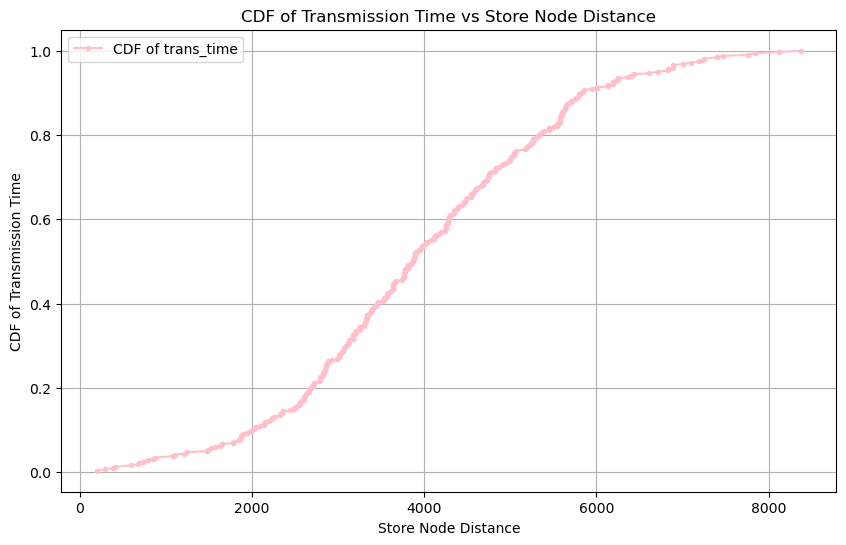

In [71]:
# 将数据排序
store_node_distance_sorted = np.sort(store_node_distance)
trans_time_sorted = np.sort(trans_time)

# 计算CDF
yvals = np.arange(1, len(trans_time_sorted) + 1) / len(trans_time_sorted)

# 绘制CDF图
plt.figure(figsize=(10, 6))
plt.plot(store_node_distance_sorted, yvals, marker='o', linestyle='-', color='pink', label='CDF of trans_time', 
         markerfacecolor='none', markersize=2, markeredgewidth=2)
# 添加标题和标签
plt.title('CDF of Transmission Time vs Store Node Distance')
plt.xlabel('Store Node Distance')
plt.ylabel('CDF of Transmission Time')

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图表
plt.show()

In [74]:
batch_size = [1, 10, 20, 25, 40, 50, 80, 100]
batches_by_query = [14, 4, 2, 3, 2 ,2 ,2 ,1]

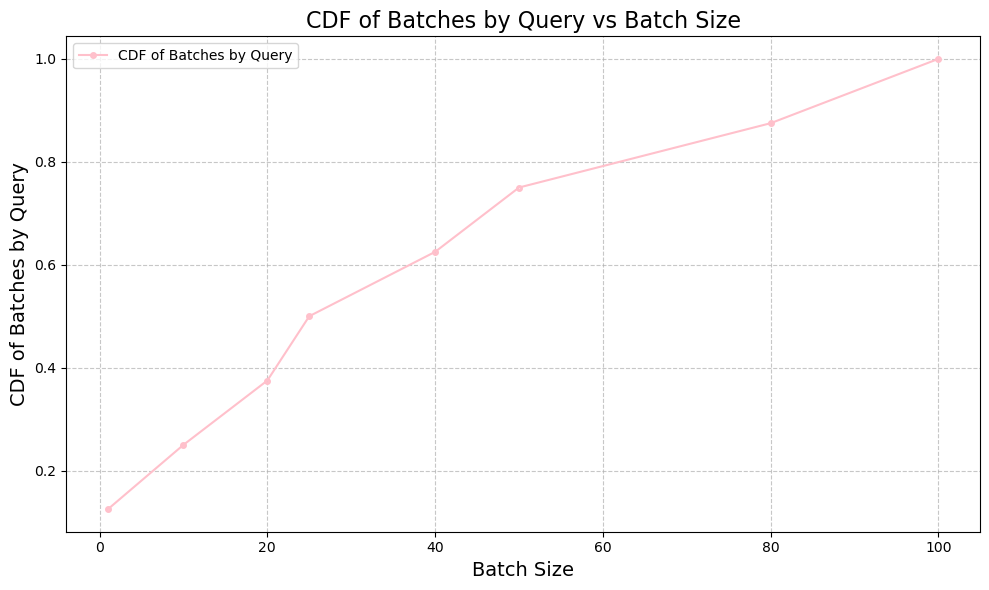

In [78]:

# 将数据排序
store_node_distance_sorted = np.sort(store_node_distance)
trans_time_sorted = np.sort(trans_time)

# 计算CDF
yvals = np.arange(1, len(batches_by_query) + 1) / len(batches_by_query)

# 绘制CDF图
plt.figure(figsize=(10, 6))
plt.plot(batch_size, yvals, marker='o', linestyle='-', color='pink', label='CDF of Batches by Query', 
         markerfacecolor='none', markersize=3, markeredgewidth=2)
# 添加标题和标签
plt.title('CDF of Batches by Query vs Batch Size', fontsize=16)
plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('CDF of Batches by Query', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# 显示图例
plt.legend()

# 显示网格
plt.grid(True)
# 显示图表
plt.show()